In [1]:
from models import *

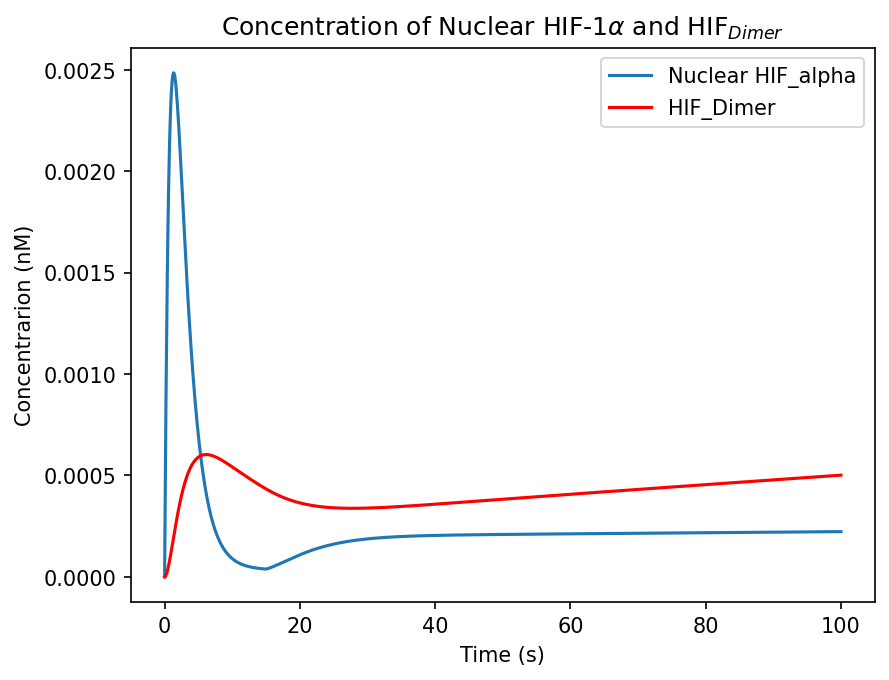

In [2]:
# assign time trajectories to each species

#declare species concentration lists empty before solving, will not work correctly without this
HIFa = list()
HIFa_pOH = list()
HIFa_aOH = list()
HIFa_aOHpOH = list()
HIFan_pOH = list()
HIFan = list()
HIFd = list()
HIFd_HRE = list()
HIFan_aOH = list()
HIFan_aOHpOH = list()
PHD = list()
PHDn = list()
HIFb = list()
HRE = list()
mRNA = list()
protein = list()
luciferase = list()

#Initial concentrations

s0 = [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 170, 50, 0, 0, 0]

t = np.linspace(0,100,1000)

species = [HIFa, HIFa_pOH, HIFa_aOH, HIFa_aOHpOH, HIFan_pOH, HIFan, HIFd, HIFd_HRE, HIFan_aOH, HIFan_aOHpOH, PHD, PHDn, HIFb, HRE, mRNA, protein, luciferase]


params = Params()
p = Params()
solution = solve_model(t, nguyen_model, s0, params)
for i in range(len(solution)):
    for j in range(len(solution[0])):
        species[j].append(solution[i][j])
        
plt.figure(dpi=150)
plt.plot(t, HIFan, label='Nuclear HIF_alpha') # simply put the name of the species to plot
plt.plot(t,HIFd, color='red', label='HIF_Dimer')
plt.xlabel('Time (s)')
plt.ylabel('Concentrarion (nM)')
plt.title(r'Concentration of Nuclear HIF-1$\alpha$ and HIF$_{Dimer}$')
plt.legend();

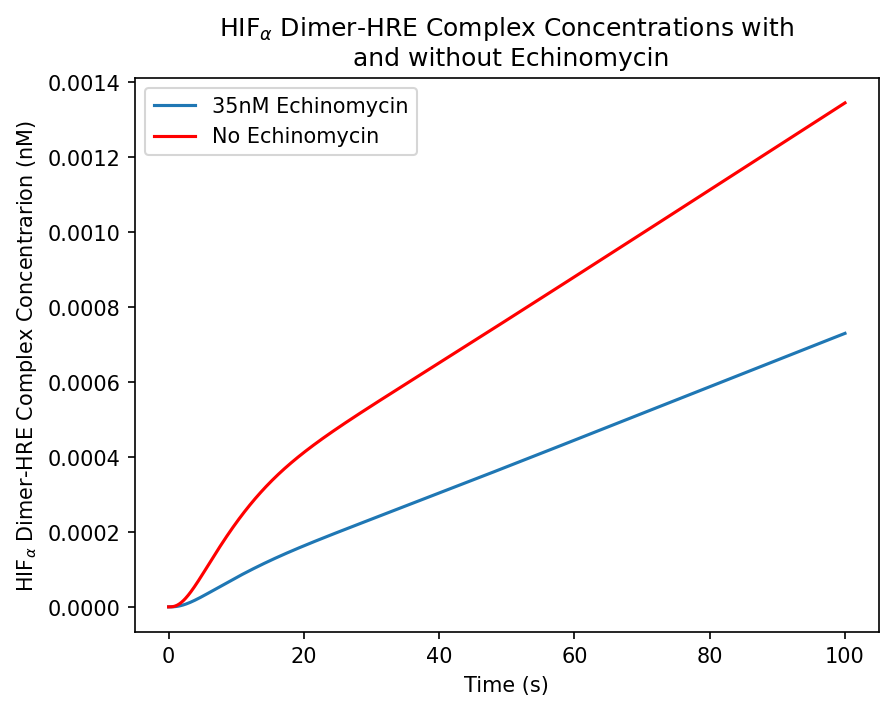

In [3]:
# repeating simulation to now solve the Echinomycin system

HIFa_e = list()
HIFa_pOH_e = list()
HIFa_aOH_e = list()
HIFa_aOHpOH_e = list()
HIFan_pOH_e = list()
HIFan_e = list()
HIFd_e = list()
HIFd_HRE_e = list()
HIFan_aOH_e = list()
HIFan_aOHpOH_e = list()
PHD_e = list()
PHDn_e = list()
HIFb_e = list()
HRE_e = list()
mRNA_e = list()
protein_e = list()
luciferase_e = list()
echinomycin = list() # new list
echinomycin_HRE = list() #new list

s0_e = [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 170, 50, 0, 0, 0, 35, 0] # two extra concentrarions corresponding with Echinomycin and Echinomycin-HRE complex

species_e = [HIFa_e, HIFa_pOH_e, HIFa_aOH_e, HIFa_aOHpOH_e, HIFan_pOH_e, HIFan_e, HIFd_e, HIFd_HRE_e, HIFan_aOH_e, HIFan_aOHpOH_e, PHD_e, PHDn_e, HIFb_e, HRE_e, mRNA_e, protein_e, luciferase_e, echinomycin, echinomycin_HRE]

solution_e = solve_model(t, echinomycin_model, s0_e, p)
for i in range(len(solution_e)):
    for j in range(len(solution_e[0])):
        species_e[j].append(solution_e[i][j])


plt.figure(dpi=150)
plt.plot(t, HIFd_HRE_e,label='35nM Echinomycin')
plt.plot(t, HIFd_HRE, label='No Echinomycin',color='red') # now you can plot any species from the two simulations.
plt.xlabel('Time (s)')
plt.ylabel(r'HIF$_\alpha$ Dimer-HRE Complex Concentrarion (nM)')
plt.title(r'HIF$_\alpha$ Dimer-HRE Complex Concentrations with'+'\n and without Echinomycin')
plt.legend();

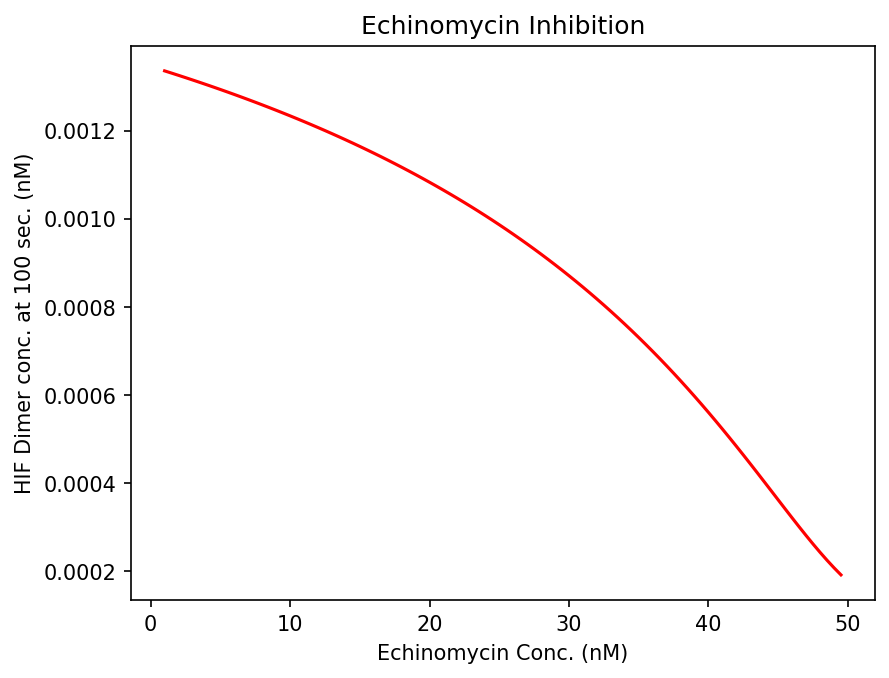

In [5]:
HIFa_r = list()
HIFa_pOH_r = list()
HIFa_aOH_r = list()
HIFa_aOHpOH_r = list()
HIFan_pOH_r = list()
HIFan_r = list()
HIFd_r = list()
HIFd_HRE_r = list()
HIFan_aOH_r = list()
HIFan_aOHpOH_r = list()
PHD_r = list()
PHDn_r = list()
HIFb_r = list()
HRE_r = list()
mRNA_r = list()
protein_r = list()
luciferase_r = list()
echinomycin_r = list() # new list
echinomycin_HRE_r = list() #new list

species_r = [HIFa_r, HIFa_pOH_r, HIFa_aOH_r, HIFa_aOHpOH_r, HIFan_pOH_r, HIFan_r, HIFd_r, HIFd_HRE_r, HIFan_aOH_r, HIFan_aOHpOH_r, PHD_r, PHDn_r, HIFb_r, HRE_r, mRNA_r, protein_r, luciferase_r, echinomycin_r, echinomycin_HRE_r]
e_concentration = np.arange(1, 50, 0.5)
hif_d_finals = [] # list to store HIF_d conc. at 100 seconds

#loop to append HIF_d conc. at 100 seconds to a list
for c in e_concentration:
    s0_r = [5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 0, 170, 50, 0, 0, 0, c, 0]
    solution_r = solve_model(t, echinomycin_model, s0_r, p)
    hif_d_finals.append(solution_r[-1][7])

plt.figure(dpi=150)
plt.plot(e_concentration, hif_d_finals, color='red')
plt.title('Echinomycin Inhibition')
plt.xlabel('Echinomycin Conc. (nM)')
plt.ylabel('HIF Dimer conc. at 100 sec. (nM)');